In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#pd.set_option('display.mpl_style','default') #fer gràfics grans
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 50)
#plt.rcParams.update({'font.size':20,'figure.figsize':(10:8)}) #set plot params. Categoriques: barchar i boxplot. numeriques Histo/scatter/linies/boxplot#

flightsdf=pd.read_csv('DelayedFlights.csv', index_col=0) #a vegades cal posar index_col=0 si no fos detectat inicialment
flightsdf.info()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [9]:
flightsdf[:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
10,2008,1,3,4,706.0,700,916.0,915,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,N263WN,52.0,50.0,37.0,11.0,9.0,IND,MDW,162,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [10]:
flightsdf.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### tots els vols son de 2008, redundant potser. Es podria eliminar si es posa en context. Ho transformarem en una data unica i deixaré els dies de la setmana per separar findes
### poblacio estadistica de vols equilibrada perfecta. el mateix nombre de vols a cada trimestre.

In [11]:
flightsdf.corr() ###es podria també pintar en colors com un heatmap

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.059651,0.000088,-0.007809,-0.011367,0.001014,0.001367,-0.000188,0.002684,0.007046,0.000860,-0.000897,0.004769,0.005498,0.019705,0.002574,0.028837,0.006467,0.000420,0.006611,0.011441,-0.003066,0.004953
DayofMonth,NaN,0.059651,1.000000,0.017476,0.001014,0.001019,0.000833,0.000758,-0.005912,-0.000880,-0.000028,-0.000244,0.004129,0.005289,0.000117,-0.002926,-0.002201,0.004671,0.001190,-0.000947,0.000916,0.005644,-0.000308,0.009100
DayOfWeek,NaN,0.000088,0.017476,1.000000,0.021924,0.027039,0.010913,0.017750,-0.009769,0.003072,0.004954,0.004738,0.006123,0.008538,0.008138,0.008516,-0.010302,0.000023,-0.001361,0.010215,0.005654,-0.006628,0.004665,0.008839
DepTime,NaN,-0.007809,0.001014,0.021924,1.000000,0.881598,0.458934,0.711513,-0.024786,-0.047040,-0.044619,-0.054831,0.127017,0.139254,-0.056003,-0.012023,0.030481,0.002280,-0.004632,-0.051948,0.005307,0.022530,-0.015273,0.169453
CRSDepTime,NaN,-0.011367,0.001019,0.027039,0.881598,1.000000,0.396724,0.710303,-0.054808,-0.034925,-0.026388,-0.036582,0.044447,0.058875,-0.029517,-0.032379,0.011408,0.000023,-0.009096,-0.107337,-0.009338,-0.032701,-0.017064,0.167734
ArrTime,NaN,0.001014,0.000833,0.010913,0.458934,0.396724,1.000000,0.619385,-0.013665,-0.013595,-0.012911,-0.017684,-0.050948,-0.053024,-0.027751,0.039818,0.001430,NaN,-0.007204,-0.083981,-0.029860,0.032395,-0.007417,-0.037949
CRSArrTime,NaN,0.001367,0.000758,0.017750,0.711513,0.710303,0.619385,1.000000,-0.060006,0.033203,0.040117,0.025907,0.043078,0.053706,0.024335,0.013819,0.037942,0.000201,0.000907,-0.096156,-0.005033,0.009227,-0.013349,0.131467
FlightNum,NaN,-0.000188,-0.005912,-0.009769,-0.024786,-0.054808,-0.013665,-0.060006,1.000000,-0.322283,-0.335956,-0.341250,0.061266,0.051852,-0.356770,-0.003918,0.015524,0.009147,-0.002885,0.055712,0.067488,0.015405,-0.002809,-0.052708
ActualElapsedTime,NaN,0.002684,-0.000880,0.003072,-0.047040,-0.034925,-0.013595,0.033203,-0.322283,1.000000,0.971122,0.976660,0.068130,0.018492,0.952980,0.166348,0.289568,NaN,NaN,0.009962,0.004066,0.177135,0.005720,-0.034204


In [12]:
flightsdf.count() #restor del total de valors 1936758, els que hi ha plens

Year                 1936758
Month                1936758
DayofMonth           1936758
DayOfWeek            1936758
DepTime              1936758
CRSDepTime           1936758
ArrTime              1929648
CRSArrTime           1936758
UniqueCarrier        1936758
FlightNum            1936758
TailNum              1936753
ActualElapsedTime    1928371
CRSElapsedTime       1936560
AirTime              1928371
ArrDelay             1928371
DepDelay             1936758
Origin               1936758
Dest                 1936758
Distance             1936758
TaxiIn               1929648
TaxiOut              1936303
Cancelled            1936758
CancellationCode     1936758
Diverted             1936758
CarrierDelay         1247488
WeatherDelay         1247488
NASDelay             1247488
SecurityDelay        1247488
LateAircraftDelay    1247488
dtype: int64

In [13]:
flightsdf.isnull().sum() #compta directament els NAN

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [15]:
#flightsdf[:3] #pinta el tail()
flightsdf[500000:500006]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1569147,2008,3,4,2,1235.0,1205,1533.0,1500,MQ,3387,N524AE,118.0,115.0,97.0,33.0,30.0,DFW,TYS,772,3.0,18.0,0,N,0,0.0,0.0,3.0,0.0,30.0
1569148,2008,3,5,3,1214.0,1205,1504.0,1500,MQ,3387,N504AE,110.0,115.0,88.0,4.0,9.0,DFW,TYS,772,3.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1569149,2008,3,7,5,1307.0,1205,1557.0,1500,MQ,3387,N505AE,110.0,115.0,87.0,57.0,62.0,DFW,TYS,772,3.0,20.0,0,N,0,0.0,37.0,0.0,0.0,20.0
1569152,2008,3,10,1,1317.0,1205,1613.0,1500,MQ,3387,N514AE,116.0,115.0,90.0,73.0,72.0,DFW,TYS,772,3.0,23.0,0,N,0,72.0,0.0,1.0,0.0,0.0
1569153,2008,3,11,2,1307.0,1205,1559.0,1500,MQ,3387,N516AE,112.0,115.0,92.0,59.0,62.0,DFW,TYS,772,3.0,17.0,0,N,0,0.0,59.0,0.0,0.0,0.0
1569154,2008,3,12,3,1240.0,1205,1532.0,1500,MQ,3387,N524AE,112.0,115.0,96.0,32.0,35.0,DFW,TYS,772,2.0,14.0,0,N,0,6.0,0.0,0.0,0.0,26.0


###### en principi cal entendre què s'està buscant. Com que no es demana NI les causes NI les circumstancies, s'eliminen les columnes.
###### Es passa a deixar les columnes de TEMPS agregades
###### ALERTA: a la visualitzacio no apareixen TOTES LES COLUMNES si no es posa la capçalera inicial !!!!
###### deixo l'índex de la columna 1 per si més endavant cal tornar a fondre dades incloent els índexs que s'han eliminat o separar
###### es podria transformar les hores de partida i arribada en %HH : %mm
#######df.to_csv exporta a csv, json o sql

In [16]:
#sumant delays es genera una nov columna agregant tots els retards a cada vol
#per DEFINICIO: Actual Elapsed Time=Taxi In+Taxi Out+Airtime operations ; 
#per DEFINICIO ArrivalDelay= carrierdelay+weatherdelay+NASdelay+LateAircraftdelay
flightsdf['delaytime']=flightsdf['CarrierDelay']+flightsdf['WeatherDelay']+flightsdf['NASDelay']+flightsdf['SecurityDelay']+flightsdf['LateAircraftDelay']+flightsdf['DepDelay']+flightsdf['TaxiIn']+flightsdf['TaxiOut']
flightsdf['delaytime'][500000:500009]

1569147     84.0
1569148      NaN
1569149    142.0
1569152    171.0
1569153    141.0
1569154     83.0
1569155     67.0
1569157    127.0
1569161     68.0
Name: delaytime, dtype: float64

In [20]:
flightsdf['avgspeed']=60*flightsdf['Distance']/flightsdf['AirTime'] #en km/h
flightsdf['avgspeed'][0:10] #head() method OK

0     418.965517
1     430.088496
2     406.578947
4     401.298701
5     474.482759
6     415.043478
10    468.679245
11    464.299065
15    262.702703
16    419.436620
Name: avgspeed, dtype: float64

### VOLS mes LLARGS i Més ENDARRERITS

In [39]:
flightsdf.sort_values(by='Distance', ascending=False) # ALERTA, hi ha valors MOOOOLT curts !!!! (ni en milles ni en km té sentit sino cancellat)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delaytime,avgspeed,DepDate
4200196,2008,7,18,5,2001.0,1955,1126.0,1130,CO,14,N67058,565.0,575.0,543.0,-4.0,6.0,HNL,EWR,4962,8.0,14.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,548.287293,2008-07-18
6979519,2008,12,20,6,2333.0,2055,1348.0,1120,CO,14,N66056,555.0,565.0,528.0,148.0,158.0,HNL,EWR,4962,11.0,16.0,0,N,0,148.0,0.0,0.0,0.0,0.0,333.0,563.863636,2008-12-20
2353671,2008,4,25,5,1345.0,1335,1826.0,1810,CO,15,N69059,641.0,635.0,620.0,16.0,10.0,EWR,HNL,4962,4.0,17.0,0,N,0,0.0,0.0,6.0,0.0,10.0,47.0,480.193548,2008-04-25
6982535,2008,12,16,2,2135.0,2055,1148.0,1120,CO,14,N76054,553.0,565.0,523.0,28.0,40.0,HNL,EWR,4962,13.0,17.0,0,N,0,0.0,0.0,0.0,0.0,28.0,98.0,569.254302,2008-12-16
566426,2008,1,13,7,1326.0,1320,1912.0,1920,CO,15,N67058,646.0,660.0,621.0,-8.0,6.0,EWR,HNL,4962,10.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,479.420290,2008-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989833,2008,9,22,1,1340.0,1325,1553.0,1425,OH,6898,N710CA,133.0,60.0,27.0,88.0,15.0,HPN,JFK,30,12.0,94.0,0,N,0,0.0,0.0,88.0,0.0,0.0,209.0,66.666667,2008-09-22
151660,2008,1,2,3,1245.0,1025,1340.0,1125,OH,5610,N806CA,55.0,60.0,11.0,135.0,140.0,IAD,DCA,24,5.0,39.0,0,N,0,135.0,0.0,0.0,0.0,0.0,319.0,130.909091,2008-01-02
1637250,2008,3,12,3,955.0,931,1021.0,948,9E,2009,91619E,26.0,17.0,10.0,33.0,24.0,IAH,HOU,24,7.0,9.0,0,N,0,0.0,0.0,9.0,0.0,24.0,73.0,144.000000,2008-03-12
2547298,2008,5,15,4,2037.0,1800,2125.0,1900,OH,4988,N806CA,48.0,60.0,31.0,145.0,157.0,JFK,LGA,11,10.0,7.0,0,N,0,145.0,0.0,0.0,0.0,0.0,319.0,21.290323,2008-05-15


In [40]:
flightsdf.sort_values(by='delaytime', ascending=False)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delaytime,avgspeed,DepDate
2235378,2008,4,10,4,724.0,1417,858.0,1605,NW,1699,N3324L,154.0,168.0,132.0,2453.0,2467.0,CLT,MSP,930,8.0,14.0,0,N,0,2436.0,0.0,0.0,0.0,17.0,4942.0,422.727273,2008-04-10
1018798,2008,2,3,7,1117.0,1820,2256.0,555,NW,808,N817NW,459.0,455.0,437.0,2461.0,2457.0,HNL,MSP,3972,6.0,16.0,0,N,0,1455.0,0.0,4.0,0.0,1002.0,4940.0,545.354691,2008-02-03
2832617,2008,5,6,2,2.0,1530,254.0,1823,NW,1107,N333NW,172.0,173.0,145.0,1951.0,1952.0,RSW,DTW,1085,10.0,17.0,0,N,0,1951.0,0.0,0.0,0.0,0.0,3930.0,448.965517,2008-05-06
3387883,2008,6,20,5,2140.0,1710,2252.0,1825,MQ,3538,N512AE,72.0,75.0,50.0,1707.0,1710.0,LIT,DFW,304,6.0,16.0,0,N,0,1707.0,0.0,0.0,0.0,0.0,3439.0,364.800000,2008-06-20
6857047,2008,12,19,5,1602.0,1325,1921.0,1546,NW,357,N366NW,259.0,201.0,192.0,1655.0,1597.0,BOS,MSP,1124,8.0,59.0,0,N,0,1307.0,0.0,58.0,0.0,290.0,3319.0,351.250000,2008-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009646,2008,12,13,6,1100.0,1045,1350.0,1347,DL,1530,N920DL,110.0,122.0,91.0,3.0,15.0,MCI,ATL,692,7.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,456.263736,2008-12-13
7009652,2008,12,13,6,1200.0,1150,1924.0,1921,DL,1538,N6710E,264.0,271.0,238.0,3.0,10.0,PDX,ATL,2172,11.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,547.563025,2008-12-13
7009702,2008,12,13,6,1531.0,1522,1822.0,1823,DL,1612,N916DN,111.0,121.0,88.0,-1.0,9.0,MCI,ATL,692,9.0,14.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,471.818182,2008-12-13
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN,NaN,359.325843,2008-12-13


##### és una burrada... 4000 minuts de retard ve a ser prop de tres dies, a considerar

In [41]:
flightsdf['DepDate'] = pd.to_datetime(flightsdf.Year*10000+flightsdf.Month*100+flightsdf.DayofMonth,format='%Y%m%d')

In [42]:
compactdf=pd.DataFrame(flightsdf, columns=['DepDate','DayOfWeek','CRSDepTime','UniqueCarrier','FlightNum','ActualElapsedTime','Origin','Dest','Distance','avgspeed','delaytime'])

In [43]:
compactdf.dropna(inplace=True) #puc eliminar els NaN en general o podria eliminar només els que no tenen retards

In [33]:
#compactdf.to_excel('resumcompacte.xlsx', sheet_name='endarrerits') #### EL METODE NO FUNCIONA PERQUE HI HA MASSA VALORS !!!
compactdf.to_csv('resumcompacte.csv') #### EL METODE NO FUNCIONA PERQUE HI HA MASSA VALORS !!!

In [44]:
print(compactdf['UniqueCarrier'].value_counts()) #després del filtrat deixa veure quines empreses van amb +retards

WN    203559
AA    132257
MQ     97555
UA     95465
OO     88991
DL     72252
XE     72008
US     59508
CO     58958
EV     56781
NW     54744
YV     50646
FL     46991
OH     39293
B6     38232
9E     35631
AS     24012
F9     15940
HA      4325
AQ       340
Name: UniqueCarrier, dtype: int64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#pd.set_option('display.mpl_style','default') #fer gràfics grans
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 50)
#plt.rcParams.update({'font.size':20,'figure.figsize':(10:8)}) #set plot params. Categoriques: barchar i boxplot. numeriques Histo/scatter/linies/boxplot#

flightsdf=pd.read_csv('resumcompacte.csv', index_col=0) #a vegades cal posar index_col=0 si no fos detectat inicialment
flightsdf.info()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247488 entries, 4 to 7009718
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DepDate            1247488 non-null  object 
 1   DayOfWeek          1247488 non-null  int64  
 2   CRSDepTime         1247488 non-null  int64  
 3   UniqueCarrier      1247488 non-null  object 
 4   FlightNum          1247488 non-null  int64  
 5   ActualElapsedTime  1247488 non-null  float64
 6   Origin             1247488 non-null  object 
 7   Dest               1247488 non-null  object 
 8   Distance           1247488 non-null  int64  
 9   avgspeed           1247488 non-null  float64
 10  delaytime          1247488 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 114.2+ MB


In [2]:
## flightsdf=pd.read_csv('DelayedFlights.csv', index_col=0) la ignoro per aprofitar el fitxer processat

##### grafico una variable categòrica

In [3]:
categorical=flightsdf['UniqueCarrier'].value_counts() #després del filtrat deixa veure quines empreses van amb +retards
categorical

WN    203559
AA    132257
MQ     97555
UA     95465
OO     88991
DL     72252
XE     72008
US     59508
CO     58958
EV     56781
NW     54744
YV     50646
FL     46991
OH     39293
B6     38232
9E     35631
AS     24012
F9     15940
HA      4325
AQ       340
Name: UniqueCarrier, dtype: int64

<BarContainer object of 20 artists>

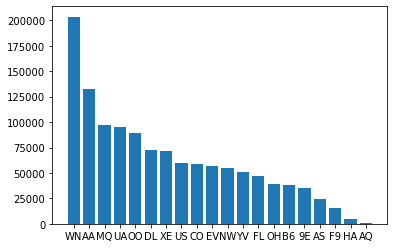

In [4]:
names = list(categorical.keys())
values = list(categorical)

fig, axs = plt.subplots() #[(1, 3, figsize=(9, 3), sharey=True)

axs.bar(names,values)

#### dues variables categoriques

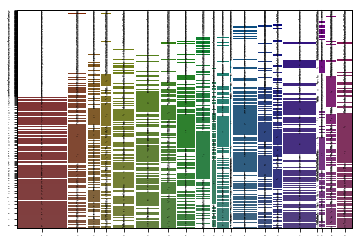

In [5]:
from statsmodels.graphics.mosaicplot import mosaic  ### ho he trobat i ho guardo per si de cas
plt.rcParams['font.size'] = 0.1
mosaic(flightsdf, ['UniqueCarrier', 'Dest']);

#### una variable NUMERICA

In [6]:
test=flightsdf['delaytime']
test


4           81.0
6          134.0
11         188.0
16          57.0
18          57.0
           ...  
7009705    144.0
7009709     65.0
7009710     82.0
7009717    181.0
7009718    219.0
Name: delaytime, Length: 1247488, dtype: float64

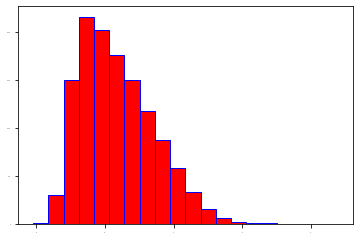

In [7]:
plt.hist(np.log10(flightsdf['delaytime']), facecolor='red', edgecolor='blue', bins=20) #he hagut de posar el log10 per visualitzar delays
plt.show()

#### dues numèriques

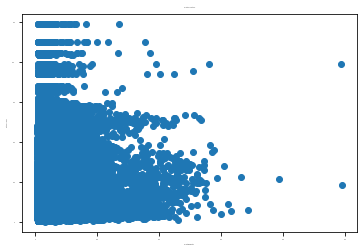

In [8]:
plt.scatter(flightsdf['delaytime'], flightsdf['Distance'])
plt.title('delaytime Vs distance')
plt.xlabel('delay time minutes')
plt.ylabel('distance in miles')
plt.show()

### sembla que als vols més curts hi ha més delay

#### tres variables estratificades

In [9]:
flightsdf=pd.read_csv('DelayedFlights.csv', index_col=0) #la rescato per requeriment de l'enunciat. hauria de fer un clear al FT, pero finsl apropera versio aguanta

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
#com que puc fer servir el SeaBorn, l'importo per la funció pràctica HUE
import seaborn as sns

sns.scatterplot(x='DepDelay', y='ArrDelay', data=flightsdf, hue='UniqueCarrier', ec=None)
plt.savefig('desa_imatge_com.png')


C:\Users\ORIOL~1.GAL\AppData\Local\Temp/ipykernel_14360/3970455894.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('desa_imatge_com.svg')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


####, segurament millor seria veure el plot sense inclinar, restant dep time o fent escala log. Sembla que el decalatge de partida  curt influeix en una arrribada tardiva tirant a llarga. Si la sortida va amb molt de retard, l'arribada és mes "puntual"

#### plot amb  més de tres variables (tinc especial devocio pel ggpair de R)

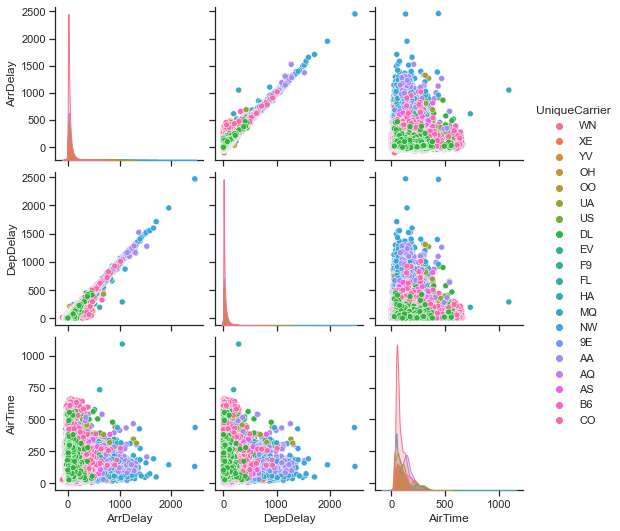

In [11]:
minidf=flightsdf[["ArrDelay", "DepDelay", "AirTime", "UniqueCarrier"]]

sns.set_theme(style="ticks")
sns.pairplot(minidf, hue='UniqueCarrier')

## 2 desar imatges amb format

In [13]:
plt.savefig('desa_imatge_com.svg')

<Figure size 432x288 with 0 Axes>